In [32]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
from textblob import TextBlob
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

#### Importing the Comments

In [33]:
comments = pd.read_csv(r'data/UScomments.csv', error_bad_lines = False)

C:\Users\Admin\AppData\Local\Temp/ipykernel_20988/1811336241.py:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  comments = pd.read_csv(r'data/UScomments.csv', error_bad_lines = False)
b'Skipping line 41589: expected 4 fields, saw 11\nSkipping line 51628: expected 4 fields, saw 7\nSkipping line 114465: expected 4 fields, saw 5\n'
b'Skipping line 142496: expected 4 fields, saw 8\nSkipping line 189732: expected 4 fields, saw 6\nSkipping line 245218: expected 4 fields, saw 7\n'
b'Skipping line 388430: expected 4 fields, saw 5\n'
C:\Users\Admin\AppData\Local\Temp/ipykernel_20988/1811336241.py:1: DtypeWarning: Columns (2,3) have mixed types. Specify dtype option on import or set low_memory=False.
  comments = pd.read_csv(r'data/UScomments.csv', error_bad_lines = False)


In [34]:
comments.head()

,video_id,comment_text,likes,replies
0,XpVt6Z1Gjjo,Logan Paul it's yo big day ‼️‼️‼️,4,0
1,XpVt6Z1Gjjo,I've been following you from the start of your...,3,0
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0
3,XpVt6Z1Gjjo,MY FAN . attendance,3,0
4,XpVt6Z1Gjjo,trending 😉,3,0


#### Checking Missing Values in our Data

In [35]:
comments.isna().sum()

video_id         0
comment_text    25
likes            0
replies          0
dtype: int64

#### Drop Missing Values

In [36]:
comments.dropna(inplace = True)

ReChecking the missing values

In [37]:
comments.isna().sum()

video_id        0
comment_text    0
likes           0
replies         0
dtype: int64

### Performing the Sentiment Analysis

Analyzing the sentiments of the users:

In [38]:

TextBlob('Logan Paul its yo big day !!!!').sentiment.polarity

0.0

#### Getting the first 1000 comments

In [39]:
df = comments[0:1000]

Getting the polarity of each comment

In [40]:
polarity = []
for comment in comments['comment_text']:
    try:
        polarity.append(TextBlob(comment).sentiment.polarity)
    except:
        polarity.append(0)


Checking the Polarity

In [41]:
print(polarity[0:50])

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.8, -0.13571428571428573, 0.0, 0.2, -0.023333333333333352, 0.5, 0.0, 0.8, -0.2916666666666667, 0.0, 0.25, -0.8, 0.0, 0.0, 0.65, 0.0, 0.375, 0.0, 0.0, 0.5, -0.04999999999999999, 0.34448051948051944, 0.5, 0.6, 0.0, 0.0, -0.30625, 0.28828125, -0.36458333333333337, 0.5, 0.012499999999999997, 0.11904761904761905, 0.16666666666666666, 0.0, -0.4, -0.125, -0.07142857142857142, 0.40727272727272723, 0.0, 0.35, 0.0, -0.03415584415584416]


Checking the overall length of comments

In [42]:
comments.shape

(691375, 4)

In [43]:
comments.head(12)

,video_id,comment_text,likes,replies
0,XpVt6Z1Gjjo,Logan Paul it's yo big day ‼️‼️‼️,4,0
1,XpVt6Z1Gjjo,I've been following you from the start of your...,3,0
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0
3,XpVt6Z1Gjjo,MY FAN . attendance,3,0
4,XpVt6Z1Gjjo,trending 😉,3,0
5,XpVt6Z1Gjjo,#1 on trending AYYEEEEE,3,0
6,XpVt6Z1Gjjo,The end though 😭👍🏻❤️,4,0
7,XpVt6Z1Gjjo,#1 trending!!!!!!!!!,3,0
8,XpVt6Z1Gjjo,Happy one year vlogaversary,3,0
9,XpVt6Z1Gjjo,You and your shit brother may have single hand...,0,0


### Perform Sentiment Analysis using NLTK Vader Sentiment Analyzer

Code based on https://towardsdatascience.com/sentimental-analysis-using-vader-a3415fef7664

In [44]:

nltk.download('vader_lexicon')


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [45]:
sid = SentimentIntensityAnalyzer()

In [46]:
polarity_nltk = []
for comment in comments['comment_text']:
    try:
        polarity_nltk.append(sid.polarity_scores(comment))
    except:
        polarity_nltk.append(0)


In [47]:
print(polarity_nltk[0:50])


[{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}, {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}, {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}, {'neg': 0.0, 'neu': 0.397, 'pos': 0.603, 'compound': 0.4648}, {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}, {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}, {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}, {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}, {'neg': 0.0, 'neu': 0.448, 'pos': 0.552, 'compound': 0.5719}, {'neg': 0.427, 'neu': 0.573, 'pos': 0.0, 'compound': -0.7717}, {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}, {'neg': 0.0, 'neu': 0.94, 'pos': 0.06, 'compound': 0.2023}, {'neg': 0.283, 'neu': 0.542, 'pos': 0.174, 'compound': -0.3877}, {'neg': 0.0, 'neu': 0.633, 'pos': 0.367, 'compound': 0.4404}, {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}, {'neg': 0.0, 'neu': 0.575, 'pos': 0.425, 'compound': 0.5719}, {'neg': 0.095, 'neu': 0.804, 'pos': 0.101, 'compound': 0.0772}, {'ne

In [48]:
len(polarity_nltk)

691375

In [77]:
df_nltk = comments.copy()
df_nltk['original sentiments'] = polarity
df_nltk['nltk scores'] = polarity_nltk
df_nltk.head()


,video_id,comment_text,likes,replies,original sentiments,nltk scores
0,XpVt6Z1Gjjo,Logan Paul it's yo big day ‼️‼️‼️,4,0,0.0,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
1,XpVt6Z1Gjjo,I've been following you from the start of your...,3,0,0.0,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0,0.0,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
3,XpVt6Z1Gjjo,MY FAN . attendance,3,0,0.0,"{'neg': 0.0, 'neu': 0.397, 'pos': 0.603, 'comp..."
4,XpVt6Z1Gjjo,trending 😉,3,0,0.0,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."


In [78]:
df_nltk['nltk scores'].apply(lambda score_dict: score_dict['compound'])

df_nltk.head()

,video_id,comment_text,likes,replies,original sentiments,nltk scores
0,XpVt6Z1Gjjo,Logan Paul it's yo big day ‼️‼️‼️,4,0,0.0,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
1,XpVt6Z1Gjjo,I've been following you from the start of your...,3,0,0.0,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0,0.0,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
3,XpVt6Z1Gjjo,MY FAN . attendance,3,0,0.0,"{'neg': 0.0, 'neu': 0.397, 'pos': 0.603, 'comp..."
4,XpVt6Z1Gjjo,trending 😉,3,0,0.0,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."


In [79]:
df_nltk['compound'] = df_nltk['nltk scores'].apply(lambda score_dict: score_dict['compound'])
df_nltk['nltk_score'] = df_nltk['compound'].apply(lambda c: 'pos' if c >= 0 else 'neg')
df_nltk.head()

,video_id,comment_text,likes,replies,original sentiments,nltk scores,compound,nltk_score
0,XpVt6Z1Gjjo,Logan Paul it's yo big day ‼️‼️‼️,4,0,0.0,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,pos
1,XpVt6Z1Gjjo,I've been following you from the start of your...,3,0,0.0,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,pos
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0,0.0,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,pos
3,XpVt6Z1Gjjo,MY FAN . attendance,3,0,0.0,"{'neg': 0.0, 'neu': 0.397, 'pos': 0.603, 'comp...",0.4648,pos
4,XpVt6Z1Gjjo,trending 😉,3,0,0.0,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,pos


### Perform Sentiment Analysis using SpaCy

In [52]:
import spacy
from spacytextblob.spacytextblob import SpacyTextBlob

nlp = spacy.load('en_core_web_sm')
nlp.add_pipe('spacytextblob')


In [53]:
polarity_spacy = []
for comment in comments['comment_text']:
    try:
        polarity_spacy.append(nlp(comment)._.blob.polarity)
    except:
        polarity_spacy.append(0)


In [80]:
df_nltk['spacy scores'] = polarity_spacy
df_nltk.head()

,video_id,comment_text,likes,replies,original sentiments,nltk scores,compound,nltk_score,spacy scores
0,XpVt6Z1Gjjo,Logan Paul it's yo big day ‼️‼️‼️,4,0,0.0,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,pos,0.0
1,XpVt6Z1Gjjo,I've been following you from the start of your...,3,0,0.0,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,pos,0.0
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0,0.0,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,pos,0.0
3,XpVt6Z1Gjjo,MY FAN . attendance,3,0,0.0,"{'neg': 0.0, 'neu': 0.397, 'pos': 0.603, 'comp...",0.4648,pos,0.0
4,XpVt6Z1Gjjo,trending 😉,3,0,0.0,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,pos,0.0


## WordCloud Analysis of Youtube Data

In [81]:
df_nltk_copy = df_nltk.copy()
comments_positive = df_nltk_copy[df_nltk_copy['original sentiments'] == 1]
comments_positive.head()

,video_id,comment_text,likes,replies,original sentiments,nltk scores,compound,nltk_score,spacy scores
64,XpVt6Z1Gjjo,yu are the best,1,0,1.0,"{'neg': 0.0, 'neu': 0.417, 'pos': 0.583, 'comp...",0.6369,pos,1.0
156,cLdxuaxaQwc,Power is the disease. Care is the cure. Keep...,0,0,1.0,"{'neg': 0.0, 'neu': 0.642, 'pos': 0.358, 'comp...",0.8910,pos,1.0
227,WYYvHb03Eog,YAS Can't wait to get it! I just need to sell ...,0,0,1.0,"{'neg': 0.0, 'neu': 0.787, 'pos': 0.213, 'comp...",0.6514,pos,1.0
307,sjlHnJvXdQs,This is priceless,0,0,1.0,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,pos,1.0
319,sjlHnJvXdQs,Summed up perfectly,0,0,1.0,"{'neg': 0.0, 'neu': 0.323, 'pos': 0.677, 'comp...",0.6369,pos,1.0


In [82]:
comments_negative = df_nltk_copy[df_nltk_copy['original sentiments'] == -1]
comments_negative.head()

,video_id,comment_text,likes,replies,original sentiments,nltk scores,compound,nltk_score,spacy scores
512,8wNr-NQImFg,BEN CARSON IS THE MAN!!!!! THEY HATE HIM CAUSE...,0,0,-1.0,"{'neg': 0.444, 'neu': 0.556, 'pos': 0.0, 'comp...",-0.8852,neg,-1.0
562,8wNr-NQImFg,Well… The brain surgeon Ben Carson just proved...,0,0,-1.0,"{'neg': 0.163, 'neu': 0.663, 'pos': 0.175, 'co...",0.0516,pos,-1.0
952,Ayb_2qbZHm4,WHY DID YOU MAKE FURRY FORCE?! SO NASTY!!!,0,0,-1.0,"{'neg': 0.42, 'neu': 0.58, 'pos': 0.0, 'compou...",-0.7237,neg,-1.0
1371,vu_9muoxT50,WTF BRUH!!!!!!,0,0,-1.0,"{'neg': 0.832, 'neu': 0.168, 'pos': 0.0, 'comp...",-0.7156,neg,-1.0
1391,vu_9muoxT50,cheeseus christ thats insane!!!,0,0,-1.0,"{'neg': 0.544, 'neu': 0.456, 'pos': 0.0, 'comp...",-0.5538,neg,-1.0


In [57]:
#combine all negative comments
total_comments  = ' '.join(comments_negative['comment_text'])
total_comments[0:100]

"BEN CARSON IS THE MAN!!!!! THEY HATE HIM CAUSE HE EXPOSED HITLARY'S RITUAL ABUSE ON CHILDREN!!!!!!! "

(-0.5, 399.5, 199.5, -0.5)

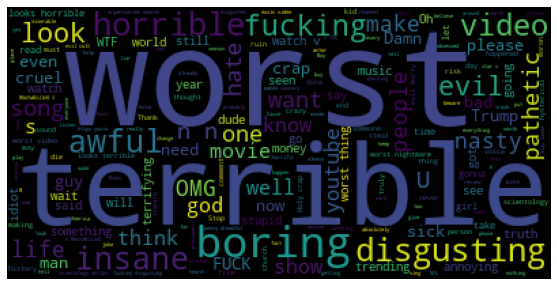

In [58]:
#Negative WordCloud
wordcloud = WordCloud(stopwords = set(STOPWORDS)).generate(total_comments)
plt.figure(figsize = (15,5))
plt.imshow(wordcloud)
plt.axis('off')

In [83]:
df_nltk['original sentiments']


0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
691395    0.0
691396    0.0
691397    0.0
691398    0.0
691399    0.0
Name: original sentiments, Length: 691375, dtype: float64

In [84]:
#Extract Positive Comments using query function of pandas
df_nltk['original_sentiments'] = df_nltk['original sentiments']
df_positive = df_nltk.query('original_sentiments == 1')
comments_positive = df_positive['comment_text']
comments_positive


64                                          yu are the best
156       Power is the disease.  Care is the cure.  Keep...
227       YAS Can't wait to get it! I just need to sell ...
307                                       This is priceless
319                                     Summed up perfectly
                                ...                        
691373                               Perfect. Every version
691383                                    Me encantaaaaa <3
691388                                     Best song ever 🤘
691389                                excellent performance
691393                                                   <3
Name: comment_text, Length: 19390, dtype: object

In [85]:
#Extract Positive Comments using where function of numpy
idx = np.where(df_nltk['original_sentiments'] == 1)
idx

(array([    64,    156,    227, ..., 691363, 691364, 691368], dtype=int64),)

In [87]:
df_nltk.index

Int64Index([     0,      1,      2,      3,      4,      5,      6,      7,
                 8,      9,
            ...
            691390, 691391, 691392, 691393, 691394, 691395, 691396, 691397,
            691398, 691399],
           dtype='int64', length=691375)

In [88]:
comments_positive = df_nltk.loc[idx]['comment_text']


(-0.5, 399.5, 199.5, -0.5)

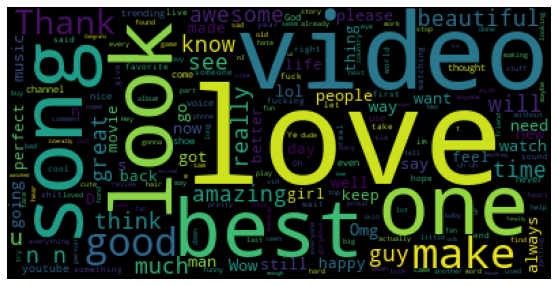

In [89]:
total_comments2 = ' '.join(comments_positive)
wordcloud = WordCloud(stopwords = set(STOPWORDS)).generate(total_comments2)
plt.figure(figsize = (15, 5))
plt.imshow(wordcloud)
plt.axis('off')

## Perform Emoji's Analysis

In [90]:
import emoji

Note-->> Every emoji has a Unicode associated with it
 '\U0001F600' is a unicode for 😀

 Unicode-->>The Unicode Standard provides a unique number for every characte ,ie 
           Unicode is a universal character encoding standard that assigns a code to every character and symbol in every language

In [91]:
print('\U0001F600')


😀


In [92]:
### lets extract emoji from below comment
comment = 'trending 😉'
[c for c in comment if c in emoji.UNICODE_EMOJI_ENGLISH]


['😉']

In [93]:
emoji_list = []
for comment in df_nltk['comment_text']:
    for char in comment:
        if char in emoji.UNICODE_EMOJI_ENGLISH:
            emoji_list.append(char)

In [94]:
len(emoji_list)

294549

In [95]:
emoji_list[0:10]

['‼', '‼', '‼', '😉', '😭', '👍', '🏻', '❤', '😍', '💋']

In [96]:
#Compute Frequencies of Each and Every Emojis
from collections import Counter

In [97]:
Counter(emoji_list).most_common(10)

[('😂', 36987),
 ('😍', 33453),
 ('❤', 31119),
 ('🔥', 8694),
 ('😭', 8398),
 ('👏', 5719),
 ('😘', 5545),
 ('👍', 5476),
 ('💖', 5359),
 ('💕', 5147)]

In [98]:
emojis = [Counter(emoji_list).most_common(10)[i][0] for i in range(10)]

In [99]:
emojis

['😂', '😍', '❤', '🔥', '😭', '👏', '😘', '👍', '💖', '💕']

In [100]:
freqs = [Counter(emoji_list).most_common(10)[i][1] for i in range(10)]
freqs

[36987, 33453, 31119, 8694, 8398, 5719, 5545, 5476, 5359, 5147]

In [102]:
# Plotting using Plotly
import plotly.graph_objs as go
from plotly.offline import iplot
trace = go.Bar(x = emojis, y = freqs)
iplot([trace])

dict_keys(['‼', '😉', '😭', '👍', '🏻', '❤', '😍', '💋', '💙', '👈', '😂', '🔥', '👻', '💎', '😆', '😁', '😒', '👏', '😊', '👌', '🤔', '💔', '👎', '🍎', '😤', '😢', '👫', '💘', '😻', '💖', '🌟', '😮', '👇', '😳', '😠', '😴', '😝', '™', '☺', '😔', '😩', '😡', '🙏', '😄', '😬', '☹', '🤷', '🤣', '😃', '🏽', '🍏', '😓', '🤦', '♀', '😞', '🏼', '✌', '💀', '👀', '😱', '👑', '🌮', '😀', '💆', '🏿', '♂', '😅', '🐂', '💩', '💕', '💓', '💗', '💝', '💜', '😎', '🎉', '😋', '😘', '😐', '😕', '🤘', '🙌', '😏', '😛', '🌳', '🌽', '🎃', '🚣', '🚂', '😑', '✨', '👅', '💦', '🌴', '😫', '😥', '💪', '🙂', '🙈', '😲', '🤢', '🎧', '🎶', '🎵', '🎼', '🎤', '♨', '💯', '👊', '💏', '🙃', '🐸', '🏈', '💁', '🤡', '🙇', '👋', '💄', '🐐', '😇', '🐊', '🌎', '🖤', '🤗', '🙄', '😨', '😌', '🤑', '😗', '📱', '🌀', '🏾', '😶', '😖', '🙋', '🌹', '😵', '🌯', '😣', '💛', '💞', '😽', '♥', '😜', '🚩', '🆙', '🆒', '✔', '🙊', '😹', '🥀', '🍫', '👸', '😰', '💚', '🎊', '🎂', '🐈', '⌚', '👿', '💸', '💰', '🏀', '🎈', '🔪', '🚫', '🤠', '🖕', '👉', '✊', '🤴', '🐘', '❄', '🍦', '🅱', '😙', '💧', '❗', '😈', '🙁', '👽', '⚠', '👭', '🍓', '😯', '🎥', '☝', '❣', '🎀', '🍭', '💌', '🐼', '😚', '🌻', '🐇', '🐰', '🔸', '🚀',

In [110]:
#how to create a dictionary of {'emoji':'frequency of emoji'}
#manual iteration
emoji_dict = {}
complete_emoji = Counter(emoji_list)
for emoji_key in complete_emoji.keys():
    emoji_dict[emoji_key] = complete_emoji[emoji_key]
emoji_dict


In [114]:
#another way to construct dictionary of frequencies
dict(zip(emojis,freqs))

{'😂': 36987,
 '😍': 33453,
 '❤': 31119,
 '🔥': 8694,
 '😭': 8398,
 '👏': 5719,
 '😘': 5545,
 '👍': 5476,
 '💖': 5359,
 '💕': 5147}

## Collect Entire Data of Youtube

In [124]:
import os
path1 = "data"
path2 = "additional_data"
additional_data_folder = os.path.join(os.getcwd(),path1,path2)
additional_data_folder


'e:\\GitHub Clones\\Text-Data-Analysis-Youtube-Case-Study\\data\\additional_data'

In [126]:
files = os.listdir(additional_data_folder)
files

['CAvideos.csv',
 'CA_category_id.json',
 'DEvideos.csv',
 'DE_category_id.json',
 'FRvideos.csv',
 'FR_category_id.json',
 'GBvideos.csv',
 'GB_category_id.json',
 'INvideos.csv',
 'IN_category_id.json',
 'JPvideos.csv',
 'JP_category_id.json',
 'KRvideos.csv',
 'KR_category_id.json',
 'MXvideos.csv',
 'MX_category_id.json',
 'RUvideos.csv',
 'RU_category_id.json',
 'USvideos.csv',
 'US_category_id.json']

In [128]:
#Getting only the CSV files
files_csv = [files[i] for i in range(0, len(files),2)]
files_csv

['CAvideos.csv',
 'DEvideos.csv',
 'FRvideos.csv',
 'GBvideos.csv',
 'INvideos.csv',
 'JPvideos.csv',
 'KRvideos.csv',
 'MXvideos.csv',
 'RUvideos.csv',
 'USvideos.csv']

In [129]:
files_csv[0].split('.')[0][0:2]

'CA'

In [130]:
#combining all csv into one DataFrame
full_df = pd.DataFrame()

for file in files_csv:
    current_df = pd.read_csv(os.path.join(additional_data_folder,file),encoding = 'iso-8859-1', error_bad_lines= False)
    current_df['country'] = file.split('.')[0][0:2]
    full_df = pd.concat([full_df, current_df])

C:\Users\Admin\AppData\Local\Temp/ipykernel_20988/1213044154.py:5: FutureWarning:

The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.



C:\Users\Admin\AppData\Local\Temp/ipykernel_20988/1213044154.py:5: FutureWarning:

The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.



C:\Users\Admin\AppData\Local\Temp/ipykernel_20988/1213044154.py:5: FutureWarning:

The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.



C:\Users\Admin\AppData\Local\Temp/ipykernel_20988/1213044154.py:5: FutureWarning:

The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.



C:\Users\Admin\AppData\Local\Temp/ipykernel_20988/1213044154.py:5: FutureWarning:

The error_bad_lines argument has been deprecated and will be removed in a future vers

In [131]:
full_df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,country
0,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. BeyoncÃ©,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. BeyoncÃ© ...,CA
1,0dBIkQ4Mz1M,17.14.11,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,2017-11-13T17:00:00.000Z,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,1688,13030,https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg,False,False,False,STill got a lot of packages. Probably will las...,CA
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146035,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO â¶ \n\nSUBSCRIBE âº ...,CA
3,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095828,132239,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...,CA
4,2Vv-BfVoq4g,17.14.11,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,10,2017-11-09T11:04:14.000Z,"edsheeran|""ed sheeran""|""acoustic""|""live""|""cove...",33523622,1634130,21082,85067,https://i.ytimg.com/vi/2Vv-BfVoq4g/default.jpg,False,False,False,ð§: https://ad.gt/yt-perfect\nð°: https://...,CA


In [132]:
full_df.shape

(375942, 17)

# Which Category has the Maximum Likes?

In [133]:
full_df['category_id'].unique()

array([10, 23, 24, 25, 22, 26,  1, 28, 20, 17, 29, 15, 19,  2, 27, 43, 30,
       44], dtype=int64)

In [138]:
cat = pd.read_csv(os.path.join(os.getcwd(),path1,'category_file.txt'))
cat.reset_index(inplace = True)
cat.columns = ['category_id', 'Category_name']
cat.set_index('category_id', inplace = True)
cat

,Category_name
category_id,
0,1: Film & Animation
1,2: Autos & Vehicles
2,10: Music
3,15: Pets & Animals
4,17: Sports
5,18: Short Movies
6,19: Travel & Events
7,20: Gaming
8,21: Videoblogging


In [140]:
dct = cat.to_dict()
dct['Category_name']

{0: '1: Film & Animation',
 1: ' 2: Autos & Vehicles',
 2: ' 10: Music',
 3: ' 15: Pets & Animals',
 4: ' 17: Sports',
 5: ' 18: Short Movies',
 6: ' 19: Travel & Events',
 7: ' 20: Gaming',
 8: ' 21: Videoblogging',
 9: ' 22: People & Blogs',
 10: ' 23: Comedy',
 11: ' 24: Entertainment',
 12: ' 25: News & Politics',
 13: ' 26: Howto & Style',
 14: ' 27: Education',
 15: ' 28: Science & Technology',
 16: ' 29: Nonprofits & Activism',
 17: ' 30: Movies',
 18: ' 31: Anime/Animation',
 19: ' 32: Action/Adventure',
 20: ' 33: Classics',
 21: ' 34: Comedy',
 22: ' 35: Documentary',
 23: ' 36: Drama',
 24: ' 37: Family',
 25: ' 38: Foreign',
 26: ' 39: Horror',
 27: ' 40: Sci-Fi/Fantasy',
 28: ' 41: Thriller',
 29: ' 42: Shorts',
 30: ' 43: Shows',
 31: ' 44: Trailers            '}

In [141]:
full_df['category_name'] = full_df['category_id'].map(dct['Category_name'])

In [142]:
full_df.columns

Index(['video_id', 'trending_date', 'title', 'channel_title', 'category_id',
       'publish_time', 'tags', 'views', 'likes', 'dislikes', 'comment_count',
       'thumbnail_link', 'comments_disabled', 'ratings_disabled',
       'video_error_or_removed', 'description', 'country', 'category_name'],
      dtype='object')

In [143]:
full_df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,country,category_name
0,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. BeyoncÃ©,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. BeyoncÃ© ...,CA,23: Comedy
1,0dBIkQ4Mz1M,17.14.11,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,2017-11-13T17:00:00.000Z,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,1688,13030,https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg,False,False,False,STill got a lot of packages. Probably will las...,CA,36: Drama
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146035,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO â¶ \n\nSUBSCRIBE âº ...,CA,36: Drama
3,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095828,132239,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...,CA,37: Family
4,2Vv-BfVoq4g,17.14.11,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,10,2017-11-09T11:04:14.000Z,"edsheeran|""ed sheeran""|""acoustic""|""live""|""cove...",33523622,1634130,21082,85067,https://i.ytimg.com/vi/2Vv-BfVoq4g/default.jpg,False,False,False,ð§: https://ad.gt/yt-perfect\nð°: https://...,CA,23: Comedy


(-20000.0, 200000.0)

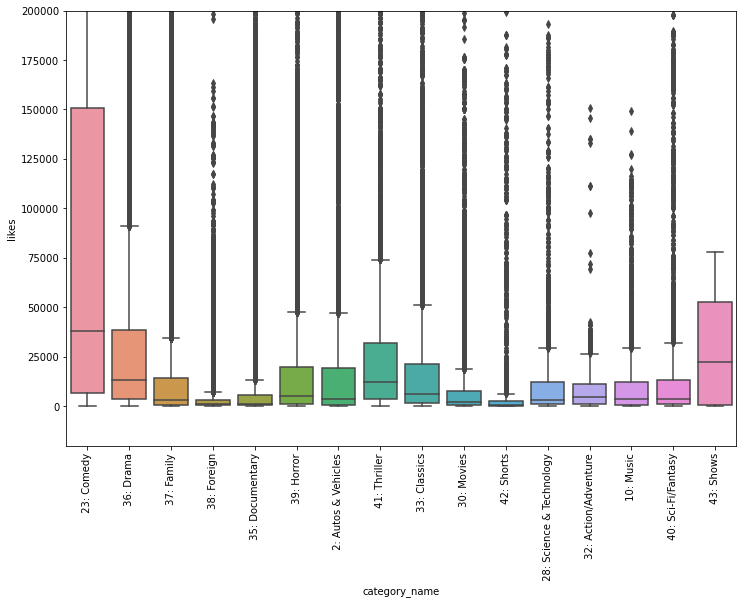

In [155]:
plt.figure(figsize = (12,8))
sns.boxplot(x = 'category_name', y = 'likes', data = full_df)
plt.xticks(rotation = 'vertical')
plt.ylim(-20000,200000)

# Find out whether audience is engaged or not

In [156]:
full_df.columns

Index(['video_id', 'trending_date', 'title', 'channel_title', 'category_id',
       'publish_time', 'tags', 'views', 'likes', 'dislikes', 'comment_count',
       'thumbnail_link', 'comments_disabled', 'ratings_disabled',
       'video_error_or_removed', 'description', 'country', 'category_name'],
      dtype='object')

In [158]:
full_df['like_rate'] = (full_df['likes']/full_df['views'])*100
full_df['dislike_rate'] = (full_df['dislikes']/full_df['views'])*100
full_df['comment_count_rate'] = (full_df['comment_count']/full_df['views'])*100
full_df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,...,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,country,category_name,like_rate,dislike_rate,comment_count_rate
0,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. BeyoncÃ©,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,...,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. BeyoncÃ© ...,CA,23: Comedy,4.589104,0.253051,0.733639
1,0dBIkQ4Mz1M,17.14.11,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,2017-11-13T17:00:00.000Z,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,1688,...,https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg,False,False,False,STill got a lot of packages. Probably will las...,CA,36: Drama,12.594873,0.166363,1.284185
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146035,5339,...,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO â¶ \n\nSUBSCRIBE âº ...,CA,36: Drama,4.575843,0.167292,0.256342
3,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095828,132239,1989,...,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...,CA,37: Family,6.309630,0.094903,0.835851
4,2Vv-BfVoq4g,17.14.11,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,10,2017-11-09T11:04:14.000Z,"edsheeran|""ed sheeran""|""acoustic""|""live""|""cove...",33523622,1634130,21082,...,https://i.ytimg.com/vi/2Vv-BfVoq4g/default.jpg,False,False,False,ð§: https://ad.gt/yt-perfect\nð°: https://...,CA,23: Comedy,4.874563,0.062887,0.253752


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, ' 23: Comedy'),
  Text(1, 0, ' 36: Drama'),
  Text(2, 0, ' 37: Family'),
  Text(3, 0, ' 38: Foreign'),
  Text(4, 0, ' 35: Documentary'),
  Text(5, 0, ' 39: Horror'),
  Text(6, 0, ' 2: Autos & Vehicles'),
  Text(7, 0, ' 41: Thriller'),
  Text(8, 0, ' 33: Classics'),
  Text(9, 0, ' 30: Movies'),
  Text(10, 0, ' 42: Shorts'),
  Text(11, 0, ' 28: Science & Technology'),
  Text(12, 0, ' 32: Action/Adventure'),
  Text(13, 0, ' 10: Music'),
  Text(14, 0, ' 40: Sci-Fi/Fantasy'),
  Text(15, 0, ' 43: Shows')])

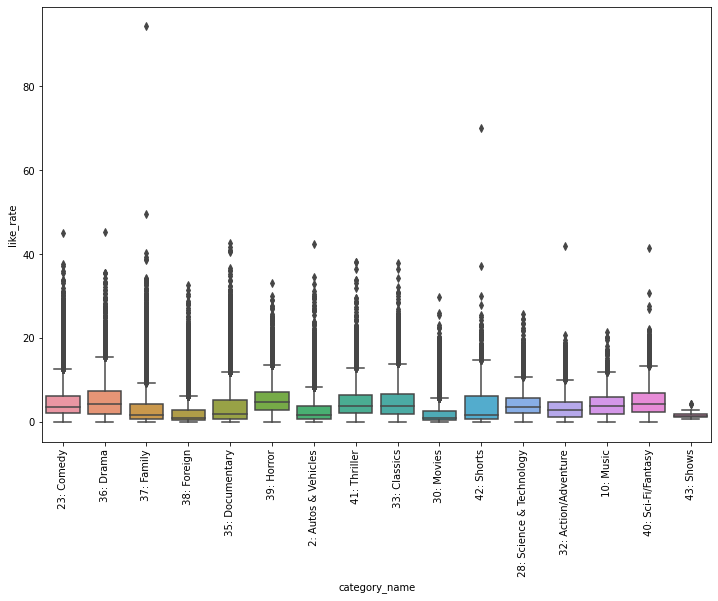

In [159]:
plt.figure(figsize = (12,8))
sns.boxplot(x = 'category_name', y = 'like_rate', data = full_df)
plt.xticks(rotation = 'vertical')

(-20.0, 40.0)

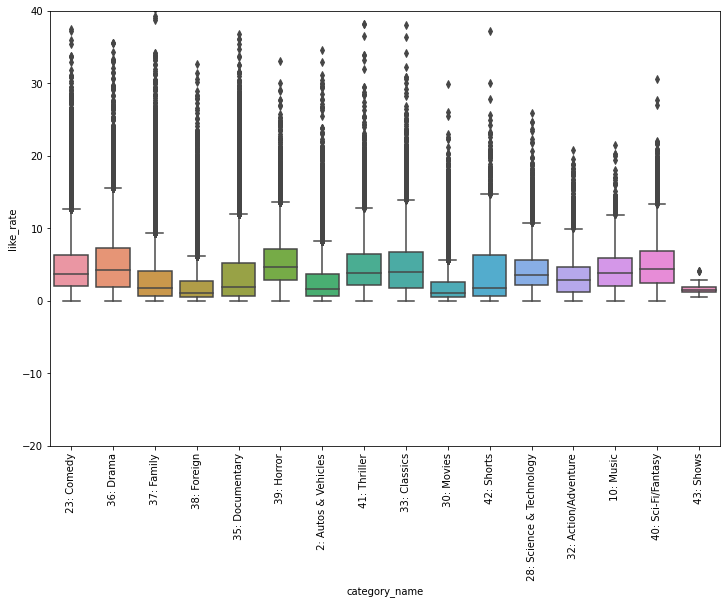

In [161]:
plt.figure(figsize = (12,8))
sns.boxplot(x = 'category_name', y = 'like_rate', data = full_df)
plt.xticks(rotation = 'vertical')
plt.ylim(-20, 40)


<AxesSubplot:xlabel='views', ylabel='likes'>

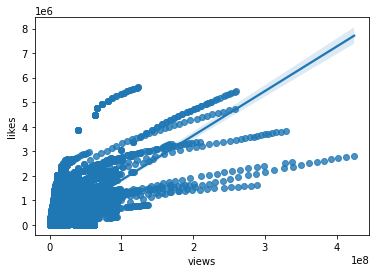

In [162]:
#analysing relationship between views and likes
sns.regplot(data = full_df, x = 'views', y = 'likes')

<AxesSubplot:>

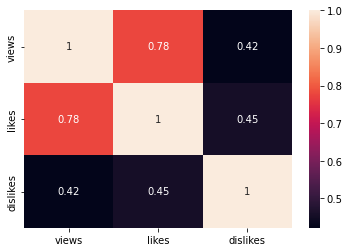

In [163]:
#finding co-relation values between ['views', 'likes', 'dislikes']
sns.heatmap(full_df[['views', 'likes', 'dislikes']].corr(), annot = True)

In [164]:
full_df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,...,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,country,category_name,like_rate,dislike_rate,comment_count_rate
0,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. BeyoncÃ©,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,...,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. BeyoncÃ© ...,CA,23: Comedy,4.589104,0.253051,0.733639
1,0dBIkQ4Mz1M,17.14.11,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,2017-11-13T17:00:00.000Z,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,1688,...,https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg,False,False,False,STill got a lot of packages. Probably will las...,CA,36: Drama,12.594873,0.166363,1.284185
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146035,5339,...,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO â¶ \n\nSUBSCRIBE âº ...,CA,36: Drama,4.575843,0.167292,0.256342
3,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095828,132239,1989,...,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...,CA,37: Family,6.309630,0.094903,0.835851
4,2Vv-BfVoq4g,17.14.11,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,10,2017-11-09T11:04:14.000Z,"edsheeran|""ed sheeran""|""acoustic""|""live""|""cove...",33523622,1634130,21082,...,https://i.ytimg.com/vi/2Vv-BfVoq4g/default.jpg,False,False,False,ð§: https://ad.gt/yt-perfect\nð°: https://...,CA,23: Comedy,4.874563,0.062887,0.253752


<AxesSubplot:xlabel='views', ylabel='likes'>

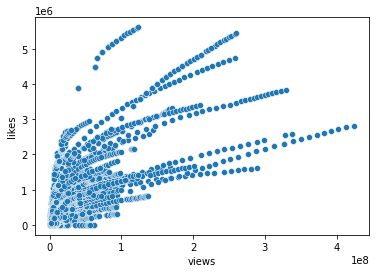

In [165]:
sns.scatterplot( x = full_df['views'], y = full_df['likes'])

In [167]:
#Which channels have the largest number of trending videos?
cdf = full_df.groupby('channel_title')['video_id'].count().sort_values(ascending = False).to_frame().reset_index().rename(columns = {'video_id':'total_videos'})
cdf

,channel_title,total_videos
0,The Late Show with Stephen Colbert,984
1,WWE,804
2,Late Night with Seth Meyers,773
3,VikatanTV,763
4,TheEllenShow,743
...,...,...
37819,LIGHTS - 001 jrny,1
37820,bangtanist,1
37821,LIGAMX Femenil,1
37822,LIGA COLOMBIANA OFICIAL,1


In [168]:
import plotly.express as px
px.bar(data_frame = cdf[0:20], x = 'channel_title', y = 'total_videos')

# Does Punctuatios in title and tags have any relation with views, likes, dislikes, comments?

In [169]:
import string

In [170]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [171]:
def punc_count(x):
    return len([c for c in x if c in string.punctuation])

In [172]:
full_df['title'][0]

0          Eminem - Walk On Water (Audio) ft. BeyoncÃ©
0    Sing zu Ende! | Gesangseinlagen vom Feinsten |...
0             Malika LePen : Femme de Gauche - Trailer
0        John Lewis Christmas Ad 2017 - #MozTheMonster
0    Sharry Mann: Cute Munda ( Song Teaser) | Parmi...
0    é¸èªããªãåç´ã«è½ä¸ï¼è·¯ä¸ã®è»ã...
0             ì¢ì by ë¯¼ì_ì¤ì¢
ì _ì¢ë ëµê°
0                       CapÃ­tulo 12 | MasterChef 2017
0    ÐÐ°Ñ
Ð°Ñ Ð¸ ÐÐ¾Ð»Ð¸Ð½Ð° ÑÑÐ°ÑÑÑ ÑÐºÐ¾...
0                   WE WANT TO TALK ABOUT OUR MARRIAGE
Name: title, dtype: object

In [173]:
text = 'Eminem - Walk On Water (Audio) ft. BeyoncÃ©'

In [174]:
punc_count(text)

4

In [175]:
sample = full_df[0:10000]

In [176]:
sample['count_punc'] = sample['title'].apply(punc_count)
sample.head()

C:\Users\Admin\AppData\Local\Temp/ipykernel_20988/2829169993.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,...,comments_disabled,ratings_disabled,video_error_or_removed,description,country,category_name,like_rate,dislike_rate,comment_count_rate,count_punc
0,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. BeyoncÃ©,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,...,False,False,False,Eminem's new track Walk on Water ft. BeyoncÃ© ...,CA,23: Comedy,4.589104,0.253051,0.733639,4
1,0dBIkQ4Mz1M,17.14.11,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,2017-11-13T17:00:00.000Z,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,1688,...,False,False,False,STill got a lot of packages. Probably will las...,CA,36: Drama,12.594873,0.166363,1.284185,1
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146035,5339,...,False,False,False,WATCH MY PREVIOUS VIDEO â¶ \n\nSUBSCRIBE âº ...,CA,36: Drama,4.575843,0.167292,0.256342,3
3,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095828,132239,1989,...,False,False,False,I know it's been a while since we did this sho...,CA,37: Family,6.309630,0.094903,0.835851,3
4,2Vv-BfVoq4g,17.14.11,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,10,2017-11-09T11:04:14.000Z,"edsheeran|""ed sheeran""|""acoustic""|""live""|""cove...",33523622,1634130,21082,...,False,False,False,ð§: https://ad.gt/yt-perfect\nð°: https://...,CA,23: Comedy,4.874563,0.062887,0.253752,3


<AxesSubplot:xlabel='count_punc', ylabel='views'>

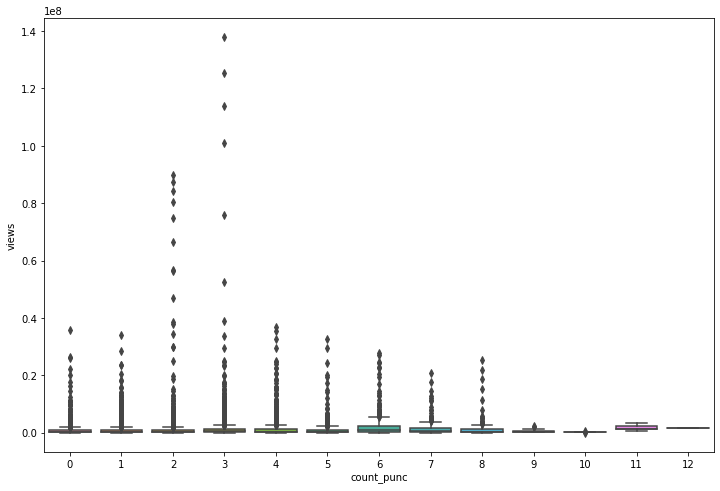

In [177]:
plt.figure(figsize = (12,8))
sns.boxplot(x = 'count_punc', y = 'views', data = sample)

(0.0, 2500000.0)

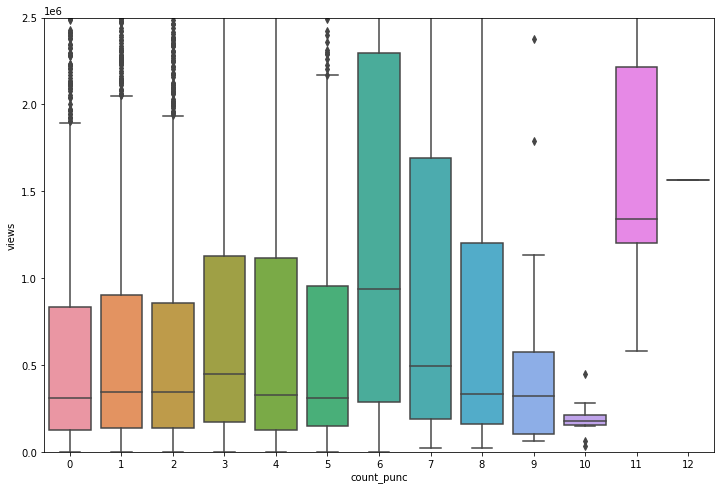

In [180]:
plt.figure(figsize = (12,8))
sns.boxplot(x = 'count_punc', y = 'views', data = sample)
plt.ylim(0, 2500000)

In [181]:
sample['count_punc'].corr(sample['views'])

0.06510009783044877